In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
from file_cache import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

2020-05-26 20:09:54,074 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/brain_seg/


In [2]:
from file_cache import *


In [3]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [4]:

from file_cache import *

img_file_list = glob('/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/**/*.*', recursive=True)

df = pd.DataFrame({'img_file':img_file_list})
df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
df.sort_values('p_id')

df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))

df['valid'] = df.p_id%5 >=3

df.valid.value_counts()

2020-05-26 20:09:58,814 utils.py[129] INFO Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-05-26 20:09:58,815 utils.py[141] INFO NumExpr defaulting to 8 threads.


False    583
True     430
Name: valid, dtype: int64

## Datasets

In [5]:
size =224
bs = 8
print('size, bs', size, bs)

size, bs 224 8


In [6]:
codes = range(5)

def get_y_fn(x):
    print(x)
    return x.replace('image', 'label')


src = (SegmentationItemList.from_df(df, path='/', cols='img_file' )
       .split_from_df(col='valid')
       #.label_from_func(get_y_fn, classes=codes)
       .label_from_df(cols='label_path', classes=codes)
      )
       #.label_from_func(cols='label_path', classes=codes))
    
print(len(src.train), len(src.valid))

#get_transforms()
data = (src.transform(None, size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

583 430


In [7]:
# tmp = df.groupby(['p_id', 'valid'], as_index=False).label_path.count()
# tmp.pivot_table(index='p_id', columns='valid', values='label_path').sort_values(0)

In [8]:
for a, b in data.dl(DatasetType.Train):
    break
    
a.shape

torch.Size([8, 3, 224, 224])

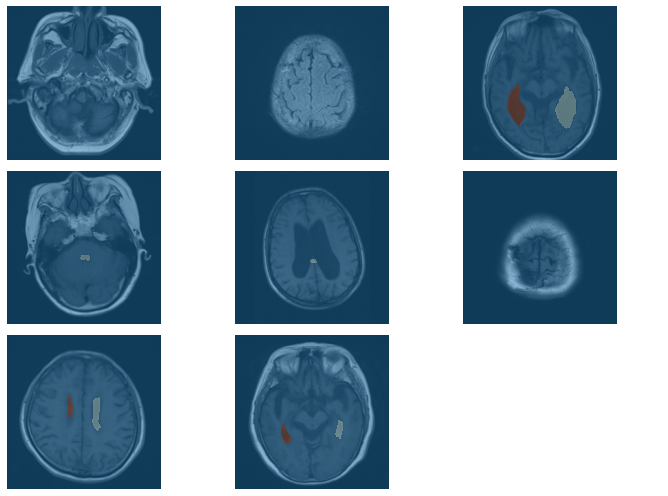

In [9]:
data.show_batch(4, figsize=(10, 7))

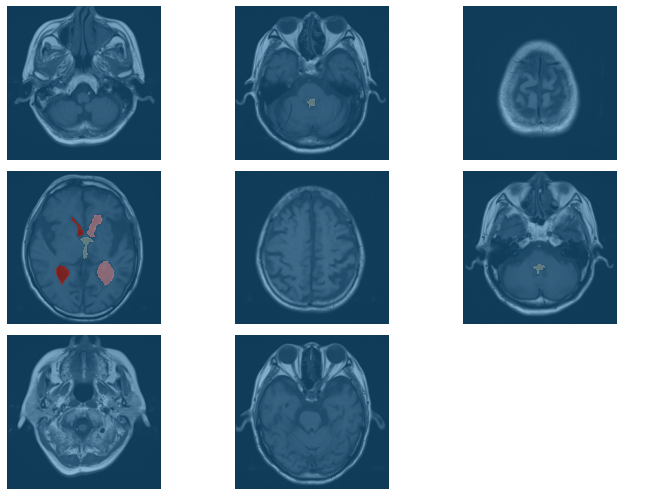

In [10]:
data.show_batch(4, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [11]:
name2id = {v:k for k,v in enumerate(codes)}
#void_code = name2id['Void']

# def acc_camvid(input, target):
#     target = target.squeeze(1)
#     mask = target != void_code
#     return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [12]:
wd = 1e-2


In [13]:
print('abc')

abc


In [14]:
#多类别的Dice Metrics

from brain.metrics import * 

from functools import partial
def dice_fn(cls_id):
    fn = partial(dice_multiply, cls_id=cls_id) 
    fn.__name__ = f'dice_{cls_id}'
    return fn
 

metrics = [ dice_fn(i) for i in range(5) ] #, accuracy,

import ipdb
# ipdb.set_trace()
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

# for sn, child in enumerate(learn.model.children()):
#     print(sn, '===', child)

In [15]:
os.path.abspath('./output/model')

'/share/felix/pj/brain_seg/output/model'

In [16]:

learn.model_dir=os.path.abspath('./output/model')
os.makedirs(learn.model_dir, exist_ok=True)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


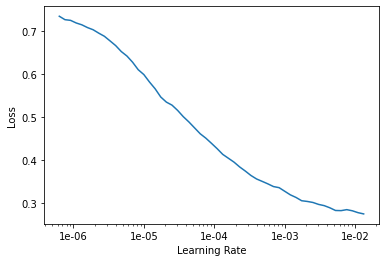

In [17]:
learn.recorder.plot()

In [18]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.066137,0.046476,0.992527,0.649519,0.680133,0.921289,0.882851,00:14
1,0.038842,0.033151,0.996291,0.785326,0.765821,0.921289,0.882851,00:13
2,0.035557,0.024298,0.996860,0.709028,0.830565,0.921289,0.882851,00:13
3,0.051129,0.024986,0.996465,0.787880,0.788746,0.921289,0.882851,00:13
4,0.030553,0.019827,0.997024,0.817145,0.824472,0.900768,0.882851,00:13


In [19]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.019242,0.018374,0.997041,0.830861,0.825017,0.887702,0.882851,00:13
1,0.016362,0.019350,0.997296,0.860343,0.852048,0.878727,0.859813,00:13
2,0.017581,0.017598,0.997199,0.858899,0.823996,0.836119,0.897703,00:13
3,0.019152,0.018706,0.996980,0.822053,0.823778,0.873022,0.914436,00:13
4,0.016152,0.017663,0.997342,0.876592,0.880889,0.950211,0.933341,00:13


In [20]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.010965,0.017892,0.997374,0.875745,0.877210,0.945752,0.935276,00:13
1,0.008690,0.017234,0.997628,0.887093,0.882487,0.944812,0.937919,00:13
2,0.009338,0.020673,0.997436,0.882074,0.845792,0.947719,0.937020,00:13
3,0.014977,0.019629,0.997260,0.863954,0.868663,0.925868,0.915520,00:13
4,0.013255,0.017563,0.997123,0.865882,0.826741,0.935932,0.940245,00:13


In [21]:
lr = 1e-4
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.011385,0.017289,0.997361,0.880246,0.867246,0.942313,0.940146,00:13
1,0.010174,0.018048,0.997437,0.880541,0.870192,0.954161,0.943097,00:13
2,0.009247,0.017855,0.997453,0.881580,0.875146,0.954423,0.943411,00:13
3,0.008072,0.019156,0.997437,0.877297,0.878272,0.953683,0.944138,00:13
4,0.007238,0.018875,0.997452,0.878709,0.880221,0.952476,0.942145,00:14
5,0.006463,0.018882,0.997603,0.888556,0.883945,0.951059,0.943500,00:13
6,0.005681,0.021177,0.997683,0.888955,0.881356,0.957187,0.942859,00:13
7,0.005331,0.020440,0.997605,0.888256,0.879101,0.948959,0.938342,00:13
8,0.004934,0.022107,0.997657,0.891307,0.881627,0.954384,0.941270,00:13
9,0.004540,0.024106,0.997629,0.890017,0.883917,0.951224,0.941786,00:13


In [22]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice_0,dice_1,dice_2,dice_3,dice_4,time
0,0.004144,0.024165,0.997646,0.888850,0.886077,0.953141,0.942893,00:13
1,0.004292,0.024464,0.997653,0.888452,0.882423,0.949376,0.941085,00:13
2,0.004239,0.025819,0.997622,0.888422,0.887455,0.946681,0.941068,00:13
3,0.004095,0.025653,0.997622,0.888191,0.887331,0.946930,0.941663,00:13
4,0.003997,0.026226,0.997594,0.886630,0.886735,0.949238,0.942519,00:13


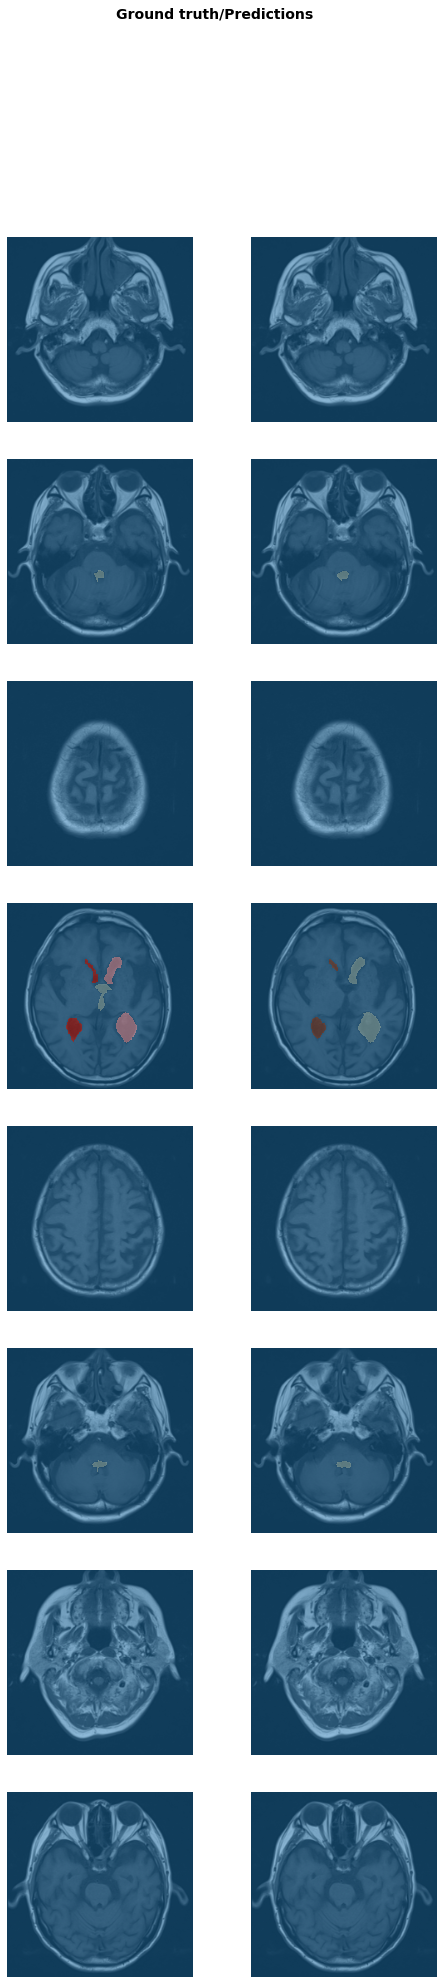

In [23]:
learn.show_results(DatasetType.Valid, rows=40)
